This notebook assists with plotting ray-theoretical TauP paths for icy moon phases at all epicentral distances. You will need a working TauP installation which you can point to in cell 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import re
import math
from subprocess import run
from matplotlib.lines import Line2D

In [2]:
# this code is written so that pretty much everything ends up in one directory:
dir_path = "~/Documents/Enceladus"

# choose which named discontinuities (.nd) file to run TauP with
model_name = "NeumannEPSCBrantutW2"
mod_file = f"{dir_path}/{model_name}.nd"

# let python know where the TauP install is
TauP_install = "~/Software/TauP-2.5.1"

# point to the location of the receiver station file used in synthetic modelling
# n.b. this is not essential, but if not using, you'll need to create your own array of epicentral distances
synthetics_folder = "parallel-axisem"

# set source depth (km)
source_dep = "2.0"

# point to .txt list of phases you want TauP to simulate
phase_list = f"{dir_path}/CurveCorePhases.txt"

In [3]:
#function to read station information from receivers.dat file type
def Read_Receivers(file_name):
    lat = {}
    lon = {}
    with open(file_name, 'r') as data:
        data = data.readlines()
        n = data[0]
        for i in range(1, len(data)):
            #linesplit
            data[i] = data[i].replace('/n', '')
            line = data[i].split()
            lat[str(i).zfill(4)] = str(float(line[0])) # i+1 used to avoid plotting the first and last stations at 0 and 180 degrees
            lon[str(i).zfill(4)] = line[1]
            
    return lat, lon, n

In [4]:
# retrieve station locations from station file
distances, stalon, n = Read_Receivers(f"~/Documents/Synthetics/{folder}/SOLVER/CadekEPSCBrantutW2/receivers.dat")
distances = list(distances.values())

# run TauP_path for each station (distance)
for distance in distances:
    path_file = f"{dir_path}/{author}/{model_name}{distance}path.gmt"
    run([f'{TauP_install}/bin/taup_path', '-mod', mod_file, '-h', source_dep, '-pf', phase_list, '-deg', distance, '-o', path_file])

In [5]:
def Read_Phase_List(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        for line in data:
            line = line.replace('\n','')
            phases = line.split(",")
            
    return phases

In [6]:
def Read_vel_mod(file_name): #this will currently break if the model file has spaces at the start of each line
    print(file_name)
    with open(file_name, 'r') as data:
        dep = []
        vp = []
        vs = []
        rho = []
        for line in data:
            try :
                float(line[0])
                p = line.split()
                dep.append(float(p[0]))
                vp.append(float(p[1]))
                vs.append(float(p[2]))
                rho.append(float(p[3]))
            except :
                pass
        
        bounds = []
        print(dep)
        for i in range(0,(len(dep)-1)) :
            if dep[i] == dep[i+1] :
                bounds.append(float(dep[i]))
        r = max(dep)
            
    return dep, vp, vs, rho, bounds, r

In [7]:
def Read_Taup_Path(file_name, dphases): # dphases to check against what's come out
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        y = []
        break_list = []
        line_number = -1
        placeholder = []
        for line in data:
            line_number += 1
            if '>' in line:
                placeholder = line.split(" ")
                break_list.append((line_number, re.sub(r"\([^()]*\)", "", placeholder[1])))
                x.append(float(-1))
                y.append(float(-1))
            else :
                p = line.split()
                x.append(math.radians(float(p[0])))
                y.append(float(p[1]))
                
        break_list.append((-1, 'End'))
        break_list = np.array(break_list)
        if(set(dphases).issubset(set(break_list[:-1,1]))) :
            print("Phase lists match.")
        else :
            print("! Phase lists do not match.")
            print(break_list[:-1,1])
            print(dphases)
            
        radians = {}
        radius = {}
        colours = {}
        for i in range(0, len(break_list[:,0])-1) :
            phase = break_list[i,1]
            phase2 = break_list[i,1]
            if phase in break_list[:i,1] :
                phase2 = phase + str(np.count_nonzero(break_list[:i,1]==phase))
            print(phase2)
            radians[phase2] = x[(int(break_list[i,0])+1):int(break_list[i+1,0])]
            radius[phase2] = y[(int(break_list[i,0])+1):int(break_list[i+1,0])]
            for j in range(0, len(dphases)) :
                if dphases[j] == phase :
                    colours[phase2] = f"C{j}"
        print(radians.keys())  
        print(colours)
        titlelist = placeholder[19:27]
        titlelist = [t.replace('\n', '') for t in titlelist]
        title = " ".join(titlelist)
        print(title)

    return radians.keys(), radians, radius, title, colours

In [8]:
# read in the phases requested from TauP
input_phases = Read_Phase_List(phase_list)
print(input_phases)

# read in the velocity model file
dep, vp, vs, rho, bounds, r = Read_vel_mod(mod_file)

# detect and check layer interface depths
print(bounds)

/Users/kd16230/Documents/Enceladus/CurveCorePhases.txt
['PKIKP', 'SKIKS', 'PKIIKP', 'SKIIKS', 'PKikKIKP', 'PKikKIIKP', 'SKikKIKP', 'SKikKIIKP']
/Users/kd16230/Documents/Enceladus/Neumann19Enc/NeumannEPSCBrantutW2.nd
[0.0, 0.8, 0.8, 3.3, 5.7, 8.2, 10.6, 13.1, 15.5, 18.0, 20.4, 22.9, 25.3, 27.8, 30.2, 32.7, 35.1, 37.6, 40.0, 40.0, 67.0, 67.0, 67.05, 68.0, 69.0, 70.0, 71.0, 71.0, 80.0, 89.23, 98.44, 107.65, 116.86, 126.07, 135.28, 144.49, 153.7, 162.91, 172.12, 181.33, 190.54, 199.74, 208.95, 218.16, 227.37, 236.58, 245.79, 255.0]
[0.8, 40.0, 67.0, 71.0]


In [9]:
# set up dicts to collect TauP results - each key contains the results for a different epicentral distance

phases = {}
radians = {}
radius = {}
title = {}
colours = {}

for distance in distances:
    path_file = f"{dir_path}/{model_name}{distance}path.gmt"
    phases[distance], radians[distance], radius[distance], title[distance], colours[distance] = Read_Taup_Path(path_file, input_phases)

/Users/kd16230/Documents/Enceladus/Neumann19Enc/NeumannEPSCBrantutW20.0path.gmt
! Phase lists do not match.
['PKIIKP' 'PKIIKP' 'SKIIKS' 'SKIIKS' 'PKikKIIKP' 'PKikKIIKP' 'SKikKIIKP'
 'SKikKIIKP']
['PKIKP', 'SKIKS', 'PKIIKP', 'SKIIKS', 'PKikKIKP', 'PKikKIIKP', 'SKikKIKP', 'SKikKIIKP']
PKIIKP
PKIIKP1
SKIIKS
SKIIKS1
PKikKIIKP
PKikKIIKP1
SKikKIIKP
SKikKIIKP1
dict_keys(['PKIIKP', 'PKIIKP1', 'SKIIKS', 'SKIIKS1', 'PKikKIIKP', 'PKikKIIKP1', 'SKikKIIKP', 'SKikKIIKP1'])
{'PKIIKP': 'C2', 'PKIIKP1': 'C2', 'SKIIKS': 'C3', 'SKIIKS1': 'C3', 'PKikKIIKP': 'C5', 'PKikKIIKP1': 'C5', 'SKikKIIKP': 'C7', 'SKikKIIKP1': 'C7'}
2.0 km deep source in the NeumannEPSCBrantutW2 model
/Users/kd16230/Documents/Enceladus/Neumann19Enc/NeumannEPSCBrantutW27.5path.gmt
! Phase lists do not match.
['PKIIKP' 'SKIIKS' 'PKikKIIKP' 'SKikKIIKP']
['PKIKP', 'SKIKS', 'PKIIKP', 'SKIIKS', 'PKikKIKP', 'PKikKIIKP', 'SKikKIKP', 'SKikKIIKP']
PKIIKP
SKIIKS
PKikKIIKP
SKikKIIKP
dict_keys(['PKIIKP', 'SKIIKS', 'PKikKIIKP', 'SKikKIIKP'])
{'PKI

In [ ]:
# this dict converts between TauP nomenclature and the terms used to describe phases on icy ocean worlds (e.g. Stähler et al 2017, Dapré & Irving 2024)
sphases = {"SKiKS":"SFoFS",
          "PcP":"PeP",
          "PcPPcP":"PeP2",
          "PcPPcPPcP":"PeP3",
          "ScSScS":"SeS2",
          "ScSScSScS":"SeS3",
          "PcPPcPPcP1":"PeP3_1", 
          "PKIKP":"PFPFP",
          "PKIKP1":"PFPFP1",
          "PKIKP2":"PFPFP2",
          "pPKIKP":"pPFPFP",
          "pPKIKP1":"pPFPFP1",
          "PKikKiKP":"P(Fof)\N{SUBSCRIPT ONE}FoFP",
          "PKikKiKP1":"P(Fof)\N{SUBSCRIPT ONE}FoFP1",
          "PKikKIKP":"P(Fof)\N{SUBSCRIPT ONE}FPFP",
          "PKikKIKP1":"P(Fof)\N{SUBSCRIPT ONE}FPFP1",
          "PKikKIKP2":"P(Fof)\N{SUBSCRIPT ONE}FPFP2",
          "PKikKIKP3":"P(Fof)\N{SUBSCRIPT ONE}FPFP3",
          "PKikKikKIKP":"P(Fof)\N{SUBSCRIPT TWO}FPFP",
          "PKikKikKIKP1":"P(Fof)\N{SUBSCRIPT TWO}FPFP1",
          "S":"S",
          "P":"P",
          "SS":"SS",
          "PP":"PP",
          "ScS":"SeS",
          "ScP":"SeP",
          "PcS":"PeS",
          "PKiKP":"PFoFP",
          "PKIIKP":"PFPPFP",
          "PKIIKP1":"PFPPFP1",
          "PKIIKP2":"PFPPFP2",
          "PKikKIIKP":"P(FoF)\N{SUBSCRIPT ONE}FPPFP",
          "PKikKIIKP1":"P(FoF)\N{SUBSCRIPT ONE}FPPFP1",
          "PKikKIIKP2":"P(FoF)\N{SUBSCRIPT ONE}FPPFP2",
          "PKJKP":"PFSFP",
          "PKJKP1":"PFSFP1",  
          "SKJKS":"SFSFS",
          "SKIIKS":"SFPPFS",
          "SKIIKS1":"SFPPFS1",
          "SKIIKS2":"SFPPFS2",
          "SKIKS":"SFPFS",
          "SKIKS1":"SFPFS1",
          "SKJKS1":"SFSFS1",
          "PcPPKIKP":"(PeP)\N{SUBSCRIPT ONE}PFPFP",
          "PcPPKIKP1":"(PeP)\N{SUBSCRIPT ONE}PFPFP1",
          "SKikKiKS":"S(Fof)\N{SUBSCRIPT ONE}FoFS",
          "SKikKiKS1":"S(Fof)\N{SUBSCRIPT ONE}FoFS1",
          "SKikKIKS":"S(Fof)\N{SUBSCRIPT ONE}FPFS",
          "SKikKIKP":"S(Fof)\N{SUBSCRIPT ONE}FPFP",
          "SKikKIKP1":"S(Fof)\N{SUBSCRIPT ONE}FPFP1",
          "SKikKIIKP":"S(Fof)\N{SUBSCRIPT ONE}FPPFP",
          "SKikKIIKP1":"S(Fof)\N{SUBSCRIPT ONE}FPPFP1",
          "SKikKIIKP2":"S(Fof)\N{SUBSCRIPT ONE}FPPFP2",
          "SKikKIKS1":"S(Fof)\N{SUBSCRIPT ONE}FPFS1",
          "SKikKikKIKS":"S(Fof)\N{SUBSCRIPT TWO}FPFS",
          "SKikKikKIKS1":"S(Fof)\N{SUBSCRIPT TWO}FPFS1"}

{'SKiKS': 'SFoFS', 'PcP': 'PeP', 'PcPPcP': 'PeP', 'PcPPcPPcP': 'PeP', 'ScSScS': 'SeS', 'ScSScSScS': 'SeS', 'PcPPcPPcP1': 'PeP_', 'PKIKP': 'PFPFP', 'PKIKP1': 'PFPFP', 'PKIKP2': 'PFPFP', 'pPKIKP': 'pPFPFP', 'pPKIKP1': 'pPFPFP', 'PKikKiKP': 'P(Fof)₁FoFP', 'PKikKiKP1': 'P(Fof)₁FoFP', 'PKikKIKP': 'P(Fof)₁FPFP', 'PKikKIKP1': 'P(Fof)₁FPFP', 'PKikKIKP2': 'P(Fof)₁FPFP', 'PKikKIKP3': 'P(Fof)₁FPFP', 'PKikKikKIKP': 'P(Fof)₂FPFP', 'PKikKikKIKP1': 'P(Fof)₂FPFP', 'S': 'S', 'P': 'P', 'SS': 'SS', 'PP': 'PP', 'ScS': 'SeS', 'ScP': 'SeP', 'PcS': 'PeS', 'PKiKP': 'PFoFP', 'PKIIKP': 'PFPPFP', 'PKIIKP1': 'PFPPFP', 'PKIIKP2': 'PFPPFP', 'PKikKIIKP': 'P(FoF)₁FPPFP', 'PKikKIIKP1': 'P(FoF)₁FPPFP', 'PKikKIIKP2': 'P(FoF)₁FPPFP', 'PKJKP': 'PFSFP', 'PKJKP1': 'PFSFP', 'SKJKS': 'SFSFS', 'SKIIKS': 'SFPPFS', 'SKIIKS1': 'SFPPFS', 'SKIIKS2': 'SFPPFS', 'SKIKS': 'SFPFS', 'SKIKS1': 'SFPFS', 'SKJKS1': 'SFSFS', 'PcPPKIKP': '(PeP)₁PFPFP', 'PcPPKIKP1': '(PeP)₁PFPFP', 'SKikKiKS': 'S(Fof)₁FoFS', 'SKikKiKS1': 'S(Fof)₁FoFS', 'SKikKIKS

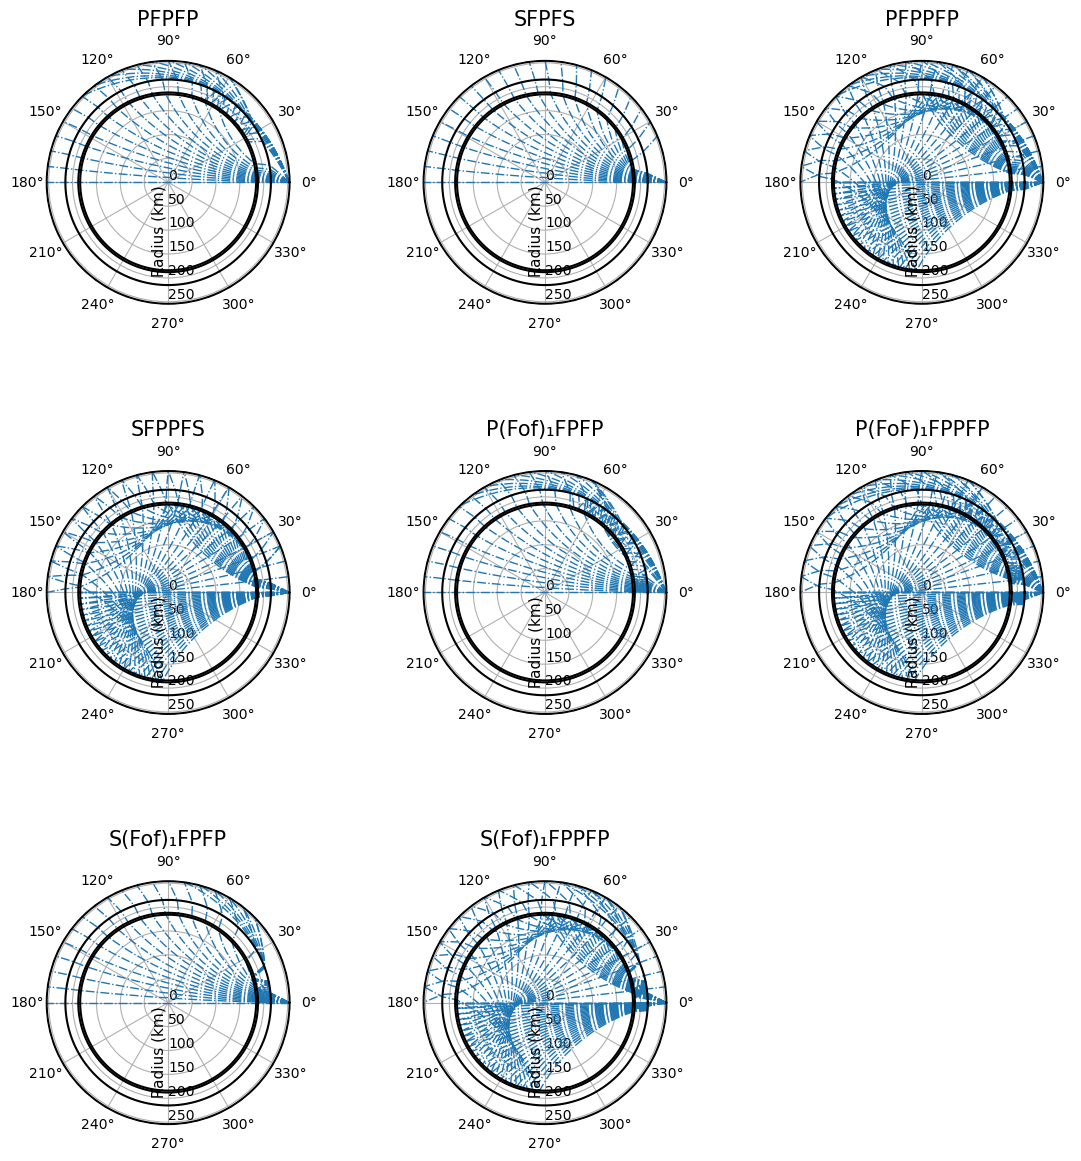

In [ ]:
### plot results ###

fig = plt.figure()
#ax1 = fig.add_subplot(221,polar=True)
#ax2 = fig.add_subplot(222,polar=True)
#ax3 = fig.add_subplot(223,polar=True)
#ax4 = fig.add_subplot(224,polar=True)

ax1 = fig.add_subplot(331,polar=True)
ax2 = fig.add_subplot(332,polar=True)
ax3 = fig.add_subplot(333,polar=True)
ax4 = fig.add_subplot(334,polar=True)
ax5 = fig.add_subplot(335,polar=True)
ax6 = fig.add_subplot(336,polar=True)
ax7 = fig.add_subplot(337,polar=True)
ax8 = fig.add_subplot(338,polar=True)

colours = {}
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

# this exists to label the legend by grouping all the numbered phases but still letting them all plot
alphaphases = {}
for key in sphases.keys():
    alphaphases[key] = re.sub(r'[0-9]','',sphases[key])    
print(alphaphases)

axes_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

# dict to decide which subplot to plot each phase on
phase_axis = {alphaphases[input_phases[0]]:ax1,
             alphaphases[input_phases[1]]:ax2,
             alphaphases[input_phases[2]]:ax3,
             alphaphases[input_phases[3]]:ax4,
             alphaphases[input_phases[4]]:ax5,
             alphaphases[input_phases[5]]:ax6,
             alphaphases[input_phases[6]]:ax7,
             alphaphases[input_phases[7]]:ax8}

def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

# optionally define a colours dictionary, e.g.
#colours = {"PFPFP":'orange',"PFPPFP":'#00c0c0','P(Fof)\N{SUBSCRIPT ONE}FPFP':'magenta'}#,'(PeP)\N{SUBSCRIPT ONE}PFPFP':'green'}

for distance in distances:
    for phase in phases[distance]:
        #if has_numbers(phase)==False: #including this line plots only the first-arriving multipath for each named phase
        ax = phase_axis[alphaphases[phase]]
        if alphaphases[phase] in colours: # if you have defined a colour dict
            line = ax.plot((radians[distance][phase]), radius[distance][phase], label=phase,#sphases[phase],
                color = colours[alphaphases[phase]], linewidth=1,linestyle="-.")
        else: # if no colour dict, just use this option
            line = ax.plot((radians[distance][phase]), radius[distance][phase], label=phase,#sphases[phase],
                linewidth=1,linestyle="-.")
            colours[alphaphases[phase]] = line[-1].get_color() # ensures phases have self-consistent colours
        ax.set_title(alphaphases[phase],fontdict={'fontsize':15})
        
# generate datapoints for circles
thetamin = 360
thetamax = 0
circle = np.linspace(thetamin, thetamax, 300)
length = len(circle)

# retrieve boundaries from velocity model
boundaries = []
for bound in bounds:
    boundaries.append(r-bound)

func = lambda length, bound : [bound]*length

circle = np.radians(circle)
    
for bound in boundaries:
    ax.plot(circle, func(length, bound), 'k')

distance = '45.0'
ax.set_thetamin(thetamin)
ax.set_thetamax(thetamax)
ax.set_rmax(max(max(radius[distance].values())))

### formatting ###
ax.set_rgrids(np.linspace(0.,250,6),fontsize=10)
ax.set_thetagrids(np.linspace(0.,thetamin-30,int(thetamin/30)),fontsize=10)
ax.set_rlabel_position(270)
ax.text(np.radians(270),ax.get_rmax()/2.-20,' Radius (km)\n',
        rotation=90,ha='center',va='center',fontsize=11)
ax.tick_params(axis='y', rotation = 'auto')
#plt.title(title)
fig.set_size_inches(12,13)
fig.tight_layout(pad=5.0)

#legend_elements = []
#for phase in colours.keys():
#    legend_elements.append(Line2D([0],[0], color=colours[phase],label=phase))
#ax.legend(handles=legend_elements,loc='best',fontsize='16')
#fig.legend(handles=legend_elements,fontsize='16')
#fig.canvas.draw()

plt.grid(True)
plt.show()